### NAME: SOMTO A.
### ID: 801215537
### HW#: 1
### GITHUB: *https://github.com/Somto-Dera/ECGR5090-Machine-Learning*

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 70% and 30% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

#### Problem 2
B)
Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. 

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

##### Steps/ Algorithm/ Pseudo
* import necessary library
* load data set
* create a normalization and standardisation function from scratch
* create a cost function from scratch
* create gradient descent function from scratch
* do some minor data preprocessing and analysis
* * Select explanatory variables and use one hot encoding to convert non number data to binary
* split data set into test and train
* call gradient descent function to get values for theta and cost history in relation to the explanatory variables
* plot a convergence of gradient descent graph with cost history.
* plot a graph showing the effect of changing the learning rate in convergence of the gradient descent with cost history.
* test result with test data set.
* plot graph comparing validation and train losses

##### import the necessary libraries
* *numpy* is used for array and matrics manipulation.
<br>
* *pandas* is used for data manipulation and analysis.
<br>
* *matplotlib* is used for data visualisation
<br>
*  *sklearn.model_selection* is used to split data sets
<br> 
* *sklearn.compose* is used to apply transformers to columns of an array or pandas DataFrame
<br>
* *sklearn.preprocessing* is used for onehot encoding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

Normalizes the features(input variables) in X.

##### Parameters
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be normalized.

##### Returns
* X_norm : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.

In [2]:
def feature_normalize(X):
    
    X_norm = (X - np.min(X))/(np.max(X) - np.min(X))
    
    return X_norm

Standardizes the features(input variables) in X.

##### Parameters
* X : n dimensional array (matrix), shape (n_samples, n_features). Features(input varibale) to be standardized.

##### Returns
* X_norm : n dimensional array (matrix), shape (n_samples,n_features). A normalized version of X.
* mu : n dimensional array (matrix), shape (n_features,). The mean value.
* sigma : n dimensional array (matrix), shape (n_features,). The standard deviation.

In [3]:
def feature_standardize(X):
    
    #Note here we need mean of indivdual column here, hence axis = 0
    mu = np.mean(X, axis = 0)
    # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
    sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
    X_norm = (X - mu)/sigma
    return X_norm, mu, sigma

#### create a cost function
* The hypotheis function is h(θ,x)= θ_0 + θ_1 * x_1

* Matrix operations are much faster than loops operations, so matrice of x, θ and (x * θ) were used

In [4]:
def compute_cost(X, y, theta):
    
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    #J = 1 / (2 * m) * np.sum(sqrErrors)
    J = 1 / (2 * m) * errors.T.dot(errors)
    
    return J

#### create gradient-cost function for linear regression.

<br>**Input Parameters**
<br> *'X' :* 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
<br> *'m' :* number of training examples
<br> *'n' :* number of features (including X_0 column of ones)
<br> *'y' :* 1D array of labels/target value for each traing example. dimension(1 x m)
<br> *'theta' :* 1D array of fitting parameters or weights. Dimension (1 x n)
<br><br>**Output Parameters**
<br> *'J' :* Scalar value.
<br><br>**Library Functions Used**
<br> *numpy.dot()* returns the product of two arrays.
<br> *numpy.subtract()* performs vector entree subtraction
<br> *numpy.square()* performs the vector entree square

In [5]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

##### load dataset housing.csv into variable 'dataset
* This dataset was provided by this HW. It contains 13 columns, the 11 columns are explanatory variables x1, ..., x10; and the final/fourth column is the dependent variable y. It has 545 data per column.

In [6]:
housing = pd.read_csv('Housing.csv')
housing.head() # To get first n rows from the dataset default value of n is 5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### minor data processing and analysis

In [7]:
dataset = housing
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
dataset.shape
dataset.sample(5)
dataset.basement.unique()

array(['no', 'yes'], dtype=object)

In [9]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in categorical_columns:
    tempdataset = pd.get_dummies(dataset[column], prefix=column)
    dataset = pd.merge(
        left=dataset,
        right=tempdataset,
        left_index=True,
        right_index=True,
    )
    dataset = dataset.drop(columns=column)
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,furnished,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,semi-furnished,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,furnished,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,furnished,0,1,0,1,0,1,1,0,0,1,1,0


In [10]:
dataset.describe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                545 non-null    int64 
 1   area                 545 non-null    int64 
 2   bedrooms             545 non-null    int64 
 3   bathrooms            545 non-null    int64 
 4   stories              545 non-null    int64 
 5   parking              545 non-null    int64 
 6   furnishingstatus     545 non-null    object
 7   mainroad_no          545 non-null    uint8 
 8   mainroad_yes         545 non-null    uint8 
 9   guestroom_no         545 non-null    uint8 
 10  guestroom_yes        545 non-null    uint8 
 11  basement_no          545 non-null    uint8 
 12  basement_yes         545 non-null    uint8 
 13  hotwaterheating_no   545 non-null    uint8 
 14  hotwaterheating_yes  545 non-null    uint8 
 15  airconditioning_no   545 non-null    uint8 
 16  aircondi

In [11]:
dataset = dataset.drop(['furnishingstatus'], axis='columns')
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0


In [12]:
np.random.seed(0)
datasetOneA_train, datasetOneA_test = train_test_split(dataset, train_size = 0.7, test_size = 0.3, random_state = 1)
datasetOneA_train.shape

(381, 18)

In [13]:
datasetOneA_test.shape

(164, 18)

In [14]:
x = datasetOneA_train.values[:, 1:18]  # get input values from first column
y = datasetOneA_train.values[:, 0]  # get output values from second column
m = len(y) # Number of training examples
temp_m = len(x)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TRAINING DATA')

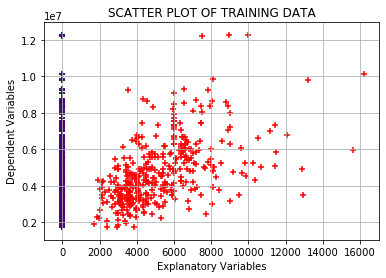

In [15]:
plt.scatter(datasetOneA_train.values[:, 1],y, color='red',marker= '+')
plt.scatter(datasetOneA_train.values[:, 2],y, color='yellow',marker= '+')
plt.scatter(datasetOneA_train.values[:, 3],y, color='blue',marker= '+')
plt.scatter(datasetOneA_train.values[:, 4],y, color='green',marker= '+')
plt.scatter(datasetOneA_train.values[:, 5],y, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TRAINING DATA')

In [16]:
x = feature_normalize(x)
print('X_norm= ', x[:5])

x, mu, sigma = feature_standardize(x)
print('X_stand= ', x[:5])

X_norm=  [[2.77777778e-01 2.46913580e-04 1.23456790e-04 6.17283951e-05
  1.23456790e-04 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [2.18518519e-01 1.23456790e-04 6.17283951e-05 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 0.00000000e+00
  6.17283951e-05 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00]
 [4.44444444e-01 1.85185185e-04 1.23456790e-04 6.17283951e-05
  1.85185185e-04 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00 0.00000000e+00 6.17283951e-05 6.17283951e-05
  0.00000000e+00]
 [1.92592593e-01 1.85185185e-04 6.17283951e-05 1.23456790e-04
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.00000000e+00 6.17283951e-05 0.00000000e+00 6.17283951e-05
  0.000

In [17]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), x))
X.shape

#Initialise theta to zero as recommended by the hw question
theta = np.zeros(18)

# declare and assign values to the gradient descent learning parameters alpha and no of iterations
iterations =1000;
alpha = 0.04;

In [18]:
trainTheta, trainCostHistory = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of train theta =', trainTheta)
print('First 5 values from train cost_history =', trainCostHistory[:5])
print('Last 5 values from train cost_history =', trainCostHistory[-5 :])

Final value of train theta = [4775201.94225721  563150.78253267   33261.30819853  529357.44428272
  443939.59948389  257906.39611154  -89231.39543677   89231.39543677
  -55317.80319064   55317.80319064 -139681.51142939  139681.51142939
  -90105.42200261   90105.42200261 -142227.43834582  142227.43834582
 -111022.96760357  111022.96760357]
First 5 values from train cost_history = [1.18935200e+13 1.08904090e+13 9.99396742e+12 9.18873839e+12
 8.46230269e+12]
Last 5 values from train cost_history = [5.29625432e+11 5.29625432e+11 5.29625432e+11 5.29625432e+11
 5.29625432e+11]


Text(0.5, 1.0, 'Convergence of gradient descent of train model')

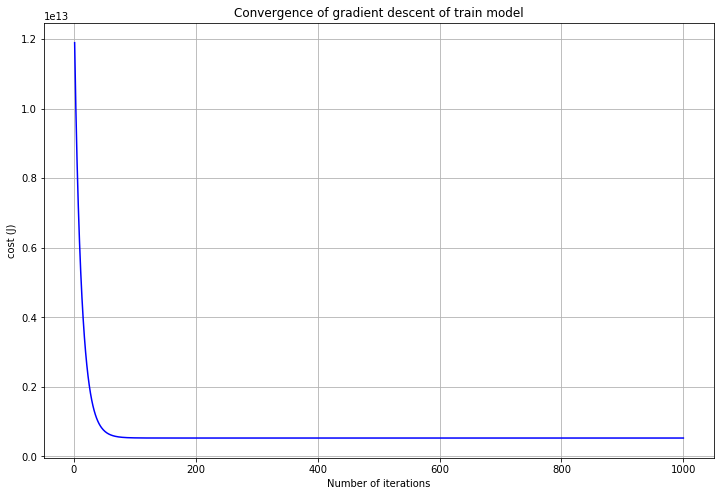

In [19]:
plt.plot(range(1, iterations +1), trainCostHistory, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent of train model")

#### experiment with various values of theta 

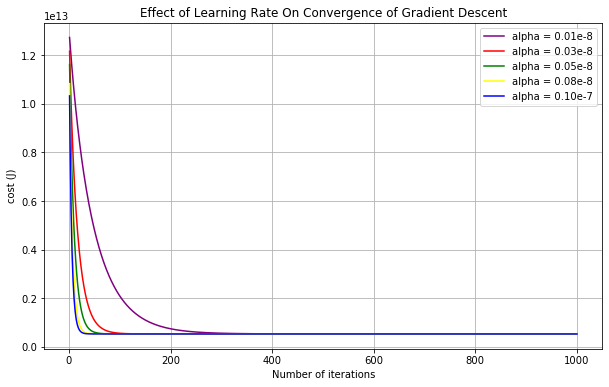

In [20]:
alpha = 0.01;
trainTheta_1, trainCostHistory_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03;
trainTheta_2, trainCostHistory_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.05;
trainTheta_3, trainCostHistory_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.08;
trainTheta_4, trainCostHistory_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.10;
trainTheta_5, trainCostHistory_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), trainCostHistory_1, color ='purple', label = 'alpha = 0.01e-8')
plt.plot(range(1, iterations +1), trainCostHistory_2, color ='red', label = 'alpha = 0.03e-8')
plt.plot(range(1, iterations +1), trainCostHistory_3, color ='green', label = 'alpha = 0.05e-8')
plt.plot(range(1, iterations +1), trainCostHistory_4, color ='yellow', label = 'alpha = 0.08e-8')
plt.plot(range(1, iterations +1), trainCostHistory_5, color ='blue', label = 'alpha = 0.10e-7')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

#### evaluate test data

In [21]:
xTest = datasetOneA_test.values[:, 1:18]  # get input values from first column
yTest = datasetOneA_test.values[:, 0]  # get output values from second column
m = len(yTest) # Number of training examples
temp_m = len(xTest)
assert (m == temp_m)

Text(0.5, 1.0, 'SCATTER PLOT OF TEST DATA')

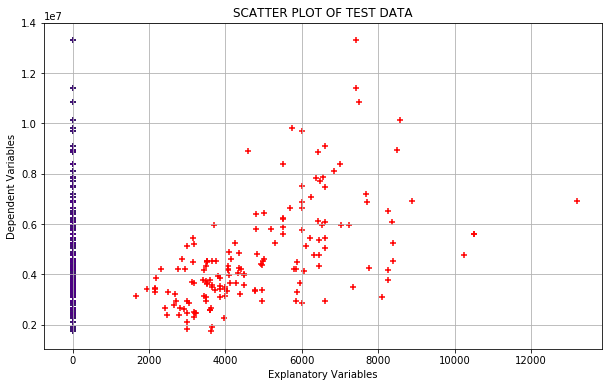

In [22]:
plt.scatter(datasetOneA_test.values[:, 1],yTest, color='red',marker= '+')
plt.scatter(datasetOneA_test.values[:, 2],yTest, color='yellow',marker= '+')
plt.scatter(datasetOneA_test.values[:, 3],yTest, color='blue',marker= '+')
plt.scatter(datasetOneA_test.values[:, 4],yTest, color='green',marker= '+')
plt.scatter(datasetOneA_test.values[:, 5],yTest, color='indigo',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (12,8)
plt.xlabel('Explanatory Variables')
plt.ylabel('Dependent Variables')
plt.title('SCATTER PLOT OF TEST DATA')

In [23]:
xTest = feature_normalize(xTest)
print('X_norm= ', xTest[:5])

xTest, mu, sigma = feature_standardize(xTest)
print('X_standard= ', xTest[:5])

X_norm=  [[4.72727273e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00]
 [6.36363636e-01 3.03030303e-04 7.57575758e-05 3.03030303e-04
  2.27272727e-04 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00]
 [7.95454545e-01 3.03030303e-04 1.51515152e-04 1.51515152e-04
  7.57575758e-05 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00 7.57575758e-05 0.00000000e+00 7.57575758e-05
  0.00000000e+00]
 [4.86363636e-01 2.27272727e-04 7.57575758e-05 2.27272727e-04
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.00000000e+00 0.00000000e+00 7.57575758e-05 7.57575758e-05
  0.000

In [24]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X_Test = np.hstack((np.ones((m,1)), xTest))

#Initialise theta to zero as recommended by the hw question
evalTheta = trainTheta
alpha = 0.04

In [25]:
testTheta, testCostHistory = gradient_descent(X_Test, yTest, evalTheta, alpha, iterations)
print('Final value of test theta =', testTheta)
print('First 5 values from test cost_history =', testCostHistory[:5])
print('Last 5 values from test cost_history =', testCostHistory[-5 :])

Final value of test theta = [4747045.73170733  505195.38109747  276453.58642462  421950.28676268
  258981.25485569  271837.25566976  -40206.13953606   40206.13953606
  -45571.44485239   45571.44485239   21160.50283682  -21160.50283682
 -119483.38605705  119483.38605705 -348577.42240319  348577.42240319
 -200963.5205195   200963.5205195 ]
First 5 values from test cost_history = [6.89550022e+11 6.75804277e+11 6.64236359e+11 6.54431382e+11
 6.46062552e+11]
Last 5 values from test cost_history = [5.70398067e+11 5.70398067e+11 5.70398067e+11 5.70398067e+11
 5.70398067e+11]


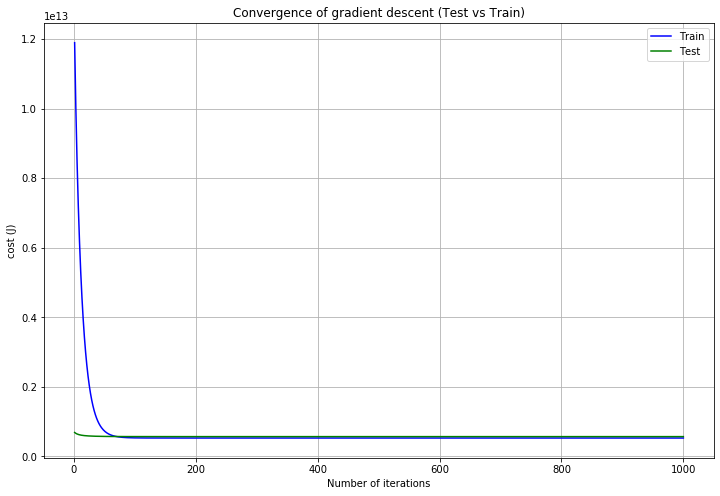

In [26]:
plt.plot(range(1, iterations +1), trainCostHistory, color ='blue', label = 'Train')
plt.plot(range(1, iterations +1), testCostHistory, color ='green', label = 'Test')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent (Test vs Train)")
plt.legend()